0
Empty DataFrame
Columns: [Marital status, Application mode, Application order, Course, Daytime evening attendance, Previous qualification, Previous qualification grade, Nacionality, Mother s qualification, Father s qualification, Mother s occupation, Father s occupation, Admission grade, Displaced, Educational special needs, Debtor, Tuition fees up to date, Gender, Scholarship holder, Age at enrollment, International, Curricular units 1st sem credited, Curricular units 1st sem enrolled, Curricular units 1st sem evaluations, Curricular units 1st sem approved, Curricular units 1st sem grade, Curricular units 1st sem without evaluations, Curricular units 2nd sem credited, Curricular units 2nd sem enrolled, Curricular units 2nd sem evaluations, Curricular units 2nd sem approved, Curricular units 2nd sem grade, Curricular units 2nd sem without evaluations, Unemployment rate, Inflation rate, GDP, Target]
Index: []

[0 rows x 37 columns]
int64      29
float64     7
object      1
Name: count

c:\Users\sorou\SorourEndProjekt\.venv\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


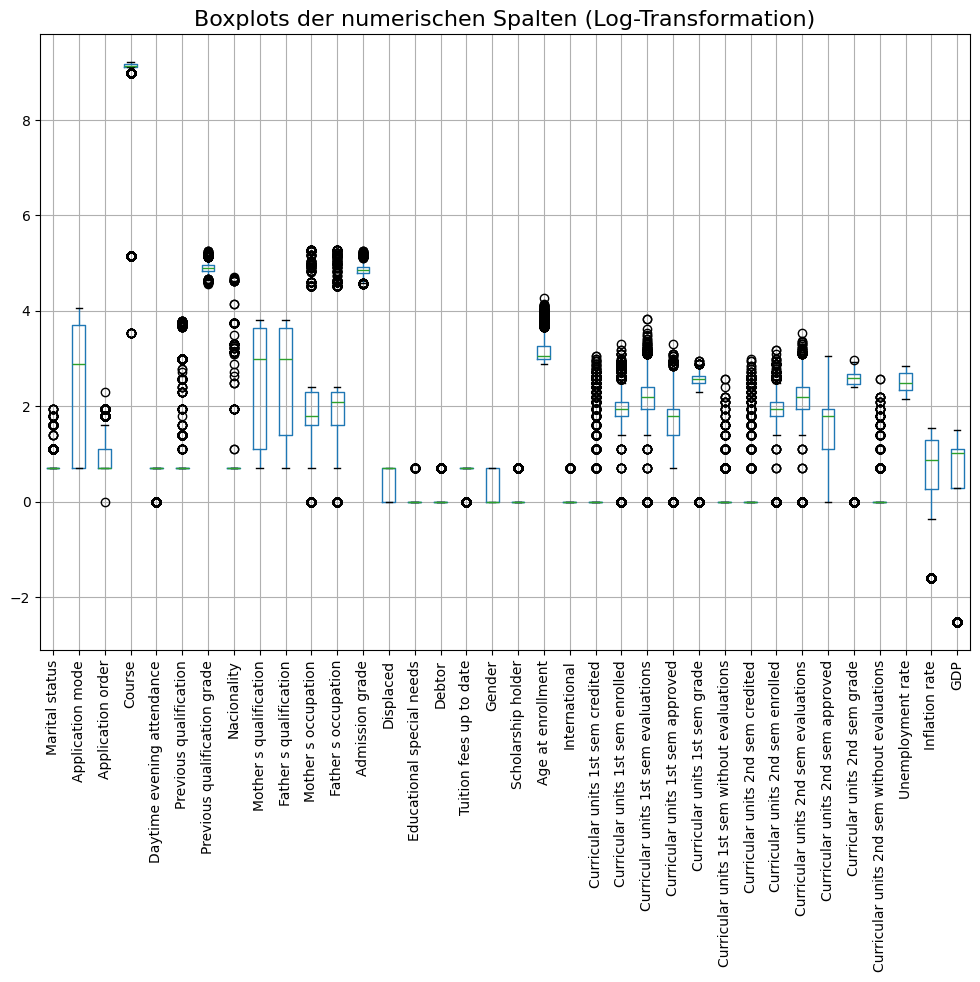


--- Ausreißeranalyse ---
MAD ist für Spalte 'Marital status' 0. Ausreißeranalyse wird übersprungen.
Spalte 'Application mode': 0 Ausreißer gefunden.
MAD ist für Spalte 'Application order' 0. Ausreißeranalyse wird übersprungen.
Spalte 'Course': 227 Ausreißer gefunden.
MAD ist für Spalte 'Daytime evening attendance' 0. Ausreißeranalyse wird übersprungen.
MAD ist für Spalte 'Previous qualification' 0. Ausreißeranalyse wird übersprungen.
Spalte 'Previous qualification grade': 0 Ausreißer gefunden.
MAD ist für Spalte 'Nacionality' 0. Ausreißeranalyse wird übersprungen.
Spalte 'Mother s qualification': 0 Ausreißer gefunden.
Spalte 'Father s qualification': 0 Ausreißer gefunden.
Spalte 'Mother s occupation': 182 Ausreißer gefunden.
Spalte 'Father s occupation': 177 Ausreißer gefunden.
Spalte 'Admission grade': 0 Ausreißer gefunden.
MAD ist für Spalte 'Displaced' 0. Ausreißeranalyse wird übersprungen.
MAD ist für Spalte 'Educational special needs' 0. Ausreißeranalyse wird übersprungen.
MAD is

c:\Users\sorou\SorourEndProjekt\.venv\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


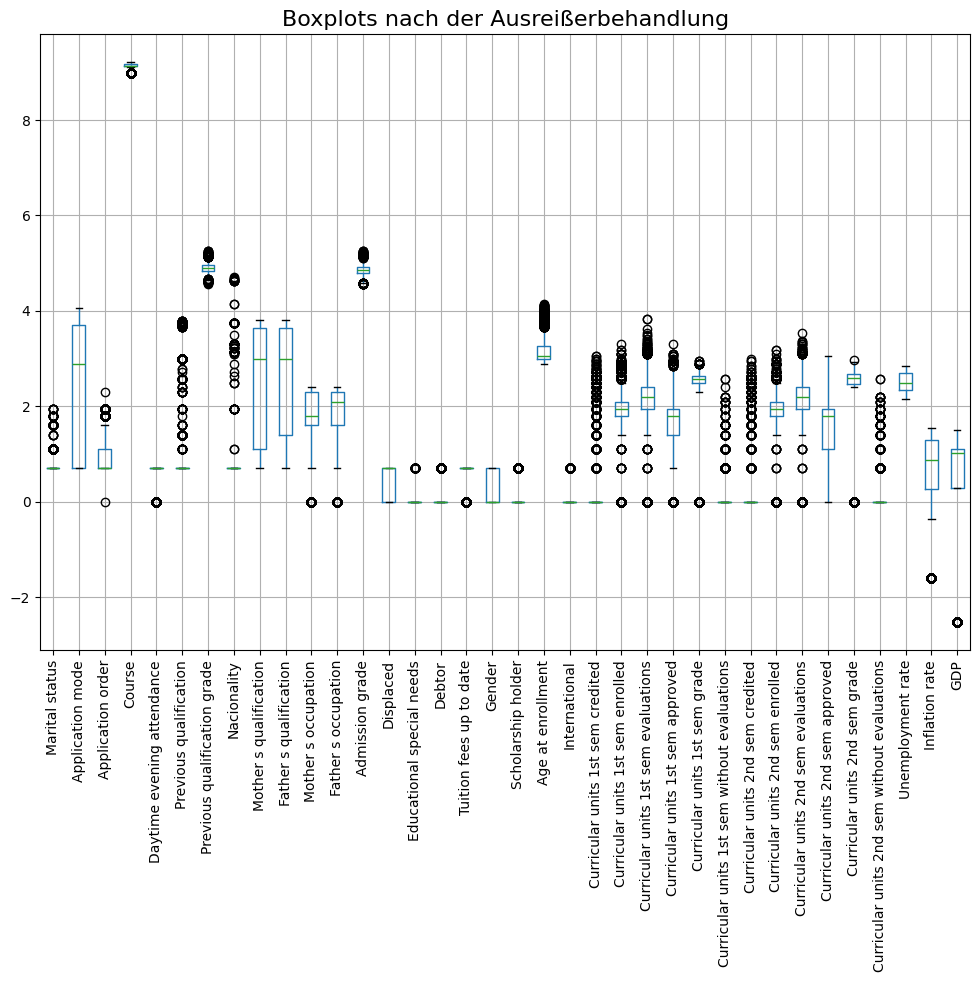

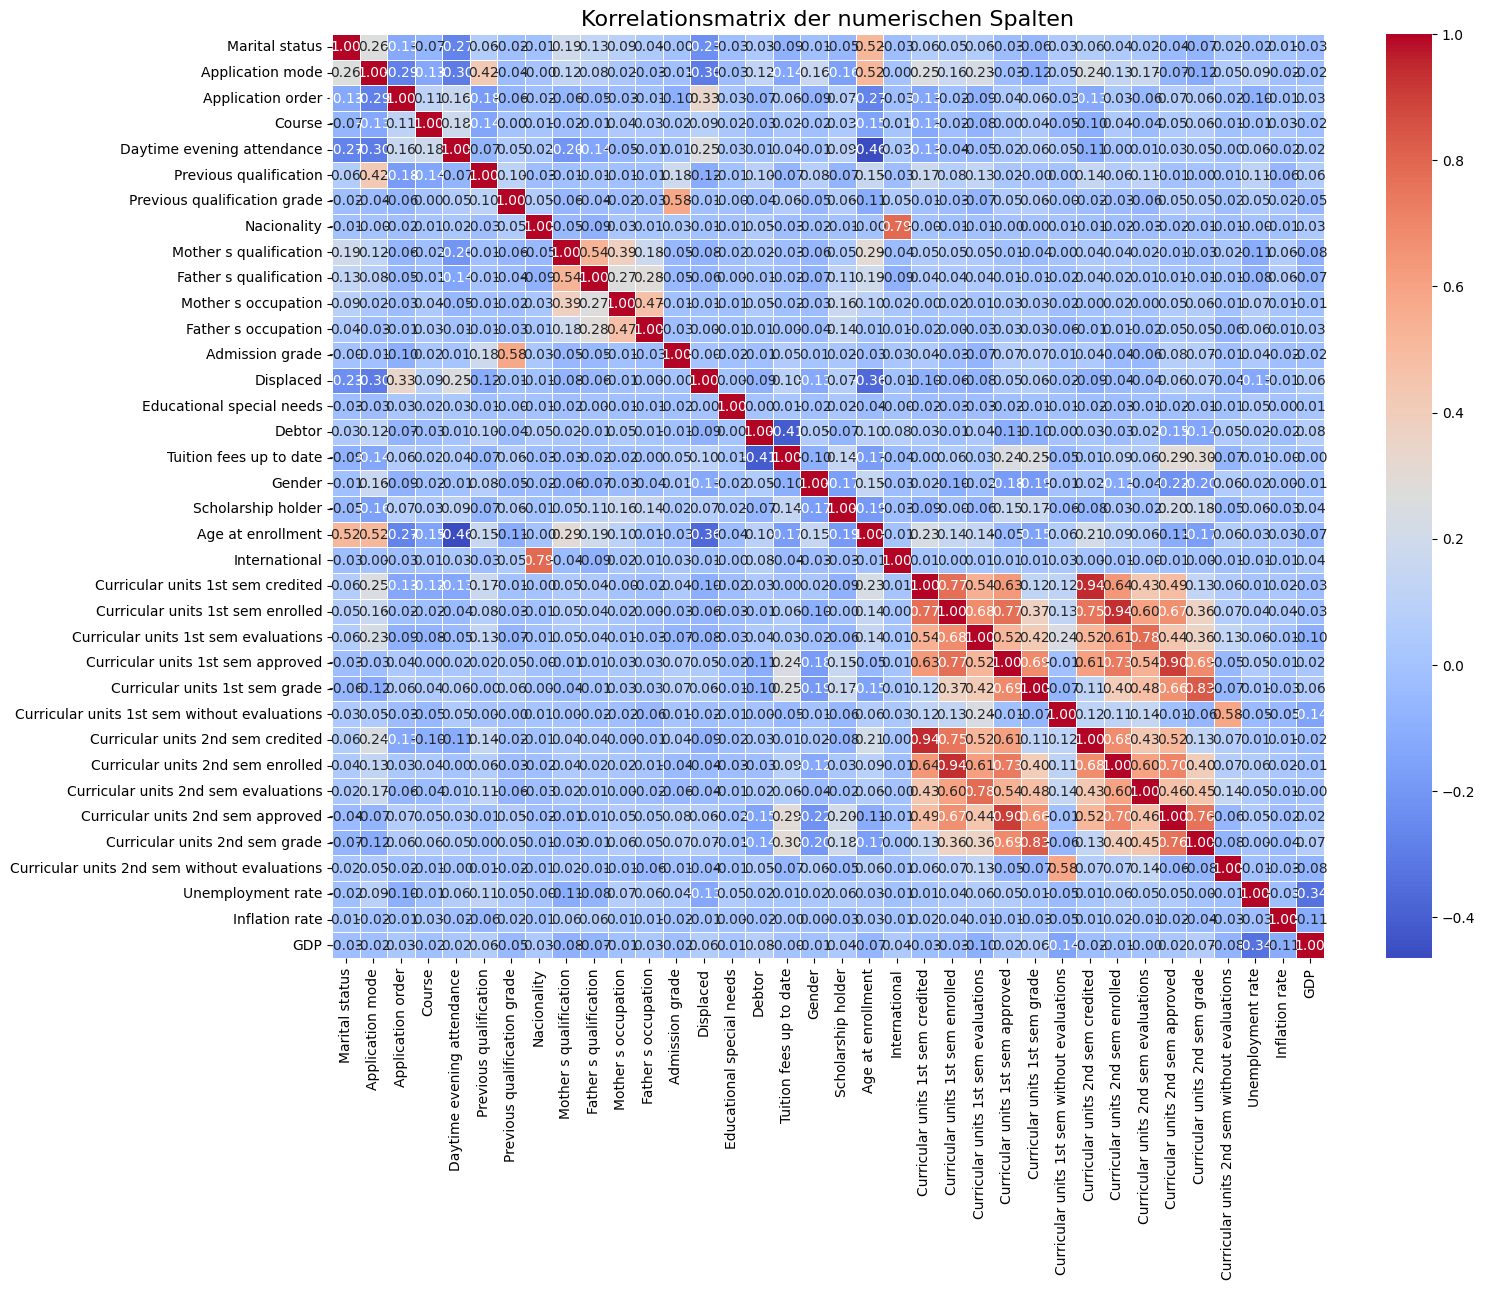

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re  
#
# CSV-Datei mit Semikolon als Trennzeichen lesen
df = pd.read_csv('data.csv', sep=';')
df.rename(columns=lambda x: re.sub(r'\W+', ' ', x).strip(), inplace=True)
# Die ersten fünf Zeilen anzeigen
df.head()
df.shape

# Überprüfen, welche Werte NaN sind (True = NaN, False = kein NaN)
print(df.isna().sum().sum())
#
# Überprüfung aller fehlenden Werte in einem Befehl
missing_values = df.isnull() | df.eq('') | df.eq('None') | df.eq('null') | df.eq('?') | df.eq('-') | df.eq('N/A') | df.eq('unknown')
# Anzahl der fehlenden Werte pro Spalte
missing_values.sum()
# Summe aller fehlenden Werte im gesamten DataFrame
missing_values.sum().sum()
# Zeige alle Zeilen, die mindestens einen fehlenden Wert haben
print(df[missing_values.any(axis=1)])
##############################################################################################################################################
#print(df.columns)
#print(df.dtypes)
print(df.dtypes.value_counts())
print(df.dtypes.unique())
for spalte in df.columns:
    if df.dtypes[spalte]=='object':

        print('spalte ist :', spalte)
object_spalten = df.select_dtypes(include='object').columns
print(object_spalten)
print(df.loc[:,'Target'])
print(df['Target'].unique())
df['Target'] = df['Target'].astype('category')
#
dezimal_liste=[]
for spalte in df.columns:
    if df.dtypes[spalte]=='float64':
        #print('spalte ist Dezimal:', spalte)
        dezimal_liste.append(spalte)
print(dezimal_liste)
# Schleife, um die angegebenen Spalten in 'int64' umzuwandeln
umwandeln_Liste = ['Age at enrollment', 'Curricular units 1st sem grade', 'Curricular units 2nd sem credited']

for spalte in umwandeln_Liste:
    if spalte in df.columns:  # Überprüfen, ob die Spalte im DataFrame existiert
        df[spalte] = df[spalte].astype('int64')

# Die Datentypen der umgewandelten Spalten anzeigen
print(df[umwandeln_Liste].dtypes)
###################################################################################################################################################
print(df.describe())
#Boxplot 
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
np.log1p(df.select_dtypes(include=['float64', 'int64'])).boxplot(rot=90)  # log1p = log(x+1) vermeidet log(0)
plt.title('Boxplots der numerischen Spalten (Log-Transformation)', fontsize=16)
plt.show()
#
#Ausreißer
import pandas as pd
import numpy as np
from statsmodels import robust

def handle_outliers(df, threshold=15):
    """
    Behandelt Ausreißer in den numerischen Spalten eines DataFrames.
    
    Args:
        df (pd.DataFrame): Der zu verarbeitende DataFrame.
        threshold (int, optional): Schwellenwert für die MAD (Median Absolute Deviation). Default = 10.
        
    Returns:
        pd.DataFrame: Der DataFrame mit behandelten Ausreißern.
    """
    # Kopie des DataFrames, um das Original nicht zu verändern
    df = df.copy()

    # Numerische Spalten identifizieren
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

    # Set zur Speicherung der Indizes von Ausreißern
    outlier_indices = set()

    print("\n--- Ausreißeranalyse ---")

    for col in numeric_columns:
        # Median und MAD berechnen
        median = df[col].median()
        mad = robust.mad(df[col])

        if mad == 0:  # Wenn MAD 0 ist, keine Ausreißeranalyse
            print(f"MAD ist für Spalte '{col}' 0. Ausreißeranalyse wird übersprungen.")
            continue

        # Untere und obere Grenze festlegen
        lower_bound = median - threshold * mad
        upper_bound = median + threshold * mad

        # Ausreißer identifizieren
        col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"Spalte '{col}': {len(col_outliers)} Ausreißer gefunden.")

        # Ausreißer durch Median ersetzen
        df.loc[col_outliers.index, col] = median
        outlier_indices.update(col_outliers.index)

    # Statistik über Ausreißer
    total_outliers = len(outlier_indices)
    percentage_outliers = (total_outliers / len(df)) * 100 if len(df) > 0 else 0
    print(f"\nGesamtanzahl der eindeutigen Ausreißer: {total_outliers}")
    print(f"Prozentsatz der Ausreißer: {percentage_outliers:.2f}%")

    return df
#anwenden 
# Standard-Anwendung mit Schwellenwert = 15
df = handle_outliers(df)

#
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 8))
np.log1p(df.select_dtypes(include=['float64', 'int64'])).boxplot(rot=90)
plt.title('Boxplots nach der Ausreißerbehandlung', fontsize=16)
plt.show()
################################################################################################################################################################
#Korrelation
# Bibliotheken importieren
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------- KORRELATIONSMATRIX VISUALISIEREN ----------------------------

# 1. Nur numerische Spalten auswählen
df_numeric = df.select_dtypes(include=['float64', 'int64']).copy()

# 2. Spalten mit Standardabweichung = 0 entfernen
df_numeric = df_numeric.loc[:, df_numeric.std(numeric_only=True) != 0]

# 3. Fehlende Werte mit dem Median auffüllen 
df_numeric = df_numeric.fillna(df_numeric.median())

# 4. Korrelationsmatrix berechnen
correlation_matrix = df_numeric.corr()

# 5. Heatmap visualisieren
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Korrelationsmatrix der numerischen Spalten', fontsize=16)
plt.show()

## ---------------------------- STARKE KORRELATIONEN HERAUSFILTERN ----------------------------

## Schwellenwert für starke Korrelationen festlegen
#threshold = 0.8

## 1. Starke Korrelationen finden (ohne Diagonale)
#starke_korrelationen = [
    #(spalte1, spalte2, correlation_matrix.loc[spalte1, spalte2])
    #for spalte1 in correlation_matrix.columns
    #for spalte2 in correlation_matrix.columns
    #if spalte1 != spalte2 and abs(correlation_matrix.loc[spalte1, spalte2]) >= threshold
#]

## 2. Starke Korrelationen ausgeben (vereinfacht)
#print("\nStarke Korrelationen:" if starke_korrelationen else "\nKeine gefunden.")
#for spalte1, spalte2, corr in starke_korrelationen:
    #print(spalte1, spalte2, round(corr, 2))

## 3. Stark korrelierte Spalten löschen (jeweils die zweite aus jedem Paar)
#columns_to_drop = []
#for spalte1, spalte2, corr in starke_korrelationen:
    #if spalte2 not in columns_to_drop:
        #columns_to_drop.append(spalte2)  # Zweite Spalte wird gelöscht

## 4. Stark korrelierte Spalten entfernen
#df_numeric.drop(columns=columns_to_drop, inplace=True, errors='ignore')

## 5. Gelöschte Spalten anzeigen
#if columns_to_drop:
    #print("\nGelöschte Spalten:")
    #print(*sorted(columns_to_drop))
